# AIPI 590 - XAI | Assignment #08
### Description
### Your Name: Wilson Tseng

#### Assignment 8 - XAI in LLMs:
[GitHub Link](https://github.com/smilewilson1999/XAI/tree/b190ff22daceb428ac8888e74e4aa68b6c640af3/Assignment%208%20-%20XAI%20in%20LLMs)


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/smilewilson1999/XAI/blob/main/Assignment%208%20-%20XAI%20in%20LLMs/XAI_Test.ipynb)

## DO:
* Use markdown and comments effectively
* Pull out classes and functions into scripts
* Ensure cells are executed in order and avoid skipping cells to maintain reproducibility
* Choose the appropriate runtime (i.e. GPU) if needed
* If you are using a dataset that is too large to put in your GitHub repository, you must either pull it in via Hugging Face Datasets or put it in an S3 bucket and use boto3 to pull from there.
* Use versioning on all installs (ie pandas==1.3.0) to ensure consistency across versions
* Implement error handling where appropriate

## DON'T:
* Absolutely NO sending us Google Drive links or zip files with data (see above).
* Load packages throughout the notebook. Please load all packages in the first code cell in your notebook.
* Add API keys or tokens directly to your notebook!!!! EVER!!!
* Include cells that you used for testing or debugging. Delete these before submission
* Have errors rendered in your notebook. Fix errors prior to submission.

In [ ]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "XAI" # Change to your repo name
git_path = 'https://github.com/smilewilson1999/XAI.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'Assignment 8 - XAI in LLMs'
path_to_notebook = os.path.join(repo_name, notebook_dir)
%cd "{path_to_notebook}"
%ls

In [2]:
%pip install numpy matplotlib scikit-learn umap-learn sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.2 MB/s eta 0:00:00


In [3]:
import numpy as np

# Dimensioning and Embedding Methods
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE  # t-SNE (t-distributed Stochastic Neighbor Embedding)
import umap  # UMAP (Uniform Manifold Approximation and Projection)

# Drawing and visualization tools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sentence embedding model
from sentence_transformers import SentenceTransformer  # Semantic analysis or classification


In [4]:
# Embedding model setup
QUERY_PROMPT = "s2p_query"
EMBEDDING_MODEL = "all-MiniLM-L6-v2"
NOISE_LEVEL = 0.01

In [5]:
# queries and documents for embeddings [cited for gpt4o for generating all these, but all be supervisored by me]
queries = [
    "What ethical considerations should be taken into account when deploying AI in education?",
    "How can we ensure fairness and inclusivity in machine learning algorithms?",
    "What are the key challenges in explaining deep learning models to non-experts?",
    "How will AI impact personalized healthcare in the next decade?",
    "What strategies can businesses use to integrate AI while maintaining data privacy?",
    "How can AI improve the efficiency of supply chain management?",
    "What are the environmental impacts of deploying large-scale AI models?",
    "How can AI be used to enhance accessibility for individuals with disabilities?",
]

docs = [
    "Deploying AI in education must consider data privacy, student consent, and minimizing biases in decision-making.",
    "Ensuring fairness in machine learning requires addressing biases in training data and creating inclusive model evaluation standards.",
    "Deep learning models are challenging to explain to non-experts due to their complexity and the black-box nature of their internal mechanisms.",
    "AI is expected to revolutionize personalized healthcare by offering predictive analytics, tailored treatment plans, and proactive patient management.",
    "Businesses integrating AI must adopt strategies like data anonymization and strict access control to ensure user data privacy.",
    "AI can enhance supply chain management by optimizing logistics, predicting demand, and automating routine processes to reduce costs.",
    "Large-scale AI models consume significant energy, leading to increased carbon emissions, which must be mitigated through green technologies.",
    "AI can significantly enhance accessibility by providing tools such as speech recognition, automated captions, and personalized assistive technologies for individuals with disabilities."
]

In [8]:
# Modified to use CPU if no CUDA-capable GPU is available [generalized it after debugging]
def load_model(model_name):
    try:
        return SentenceTransformer(model_name).cuda()
    except RuntimeError as e:
        print("CUDA not available, falling back to CPU.")
        return SentenceTransformer(model_name)

def generate_embeddings(model, texts):
    return model.encode(texts)

model = load_model(EMBEDDING_MODEL)
query_embeddings = generate_embeddings(model, queries)
doc_embeddings = generate_embeddings(model, docs)

CUDA not available, falling back to CPU.


In [9]:
# Adding noise to query embeddings for variety
np.random.seed(24)
noise = np.random.normal(0, NOISE_LEVEL, query_embeddings.shape)
noisy_query_embeddings = query_embeddings + noise
combined_embeddings = np.vstack((noisy_query_embeddings, doc_embeddings))
labels = [f"Query {i+1}" for i in range(len(queries))] + [f"Doc {i+1}" for i in range(len(docs))]


In [12]:
# Dimensionality reduction functions
def apply_pca(embeddings, n_components=3):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(embeddings)

def apply_tsne(embeddings, n_components=3, perplexity=5):
    tsne = TSNE(n_components=n_components, random_state=42, perplexity=perplexity)
    return tsne.fit_transform(embeddings)

def apply_umap(embeddings, n_components=3, n_neighbors=15, min_dist=0.2):
    umap_model = umap.UMAP(n_components=n_components, random_state=42, n_neighbors=n_neighbors, min_dist=min_dist)
    return umap_model.fit_transform(embeddings)


In [13]:
# Applying dimensionality reduction techniques
pca_result = apply_pca(combined_embeddings)
tsne_result = apply_tsne(combined_embeddings, perplexity=min(5, len(combined_embeddings) - 1)) # perplexity < n_samples
umap_result = apply_umap(combined_embeddings)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


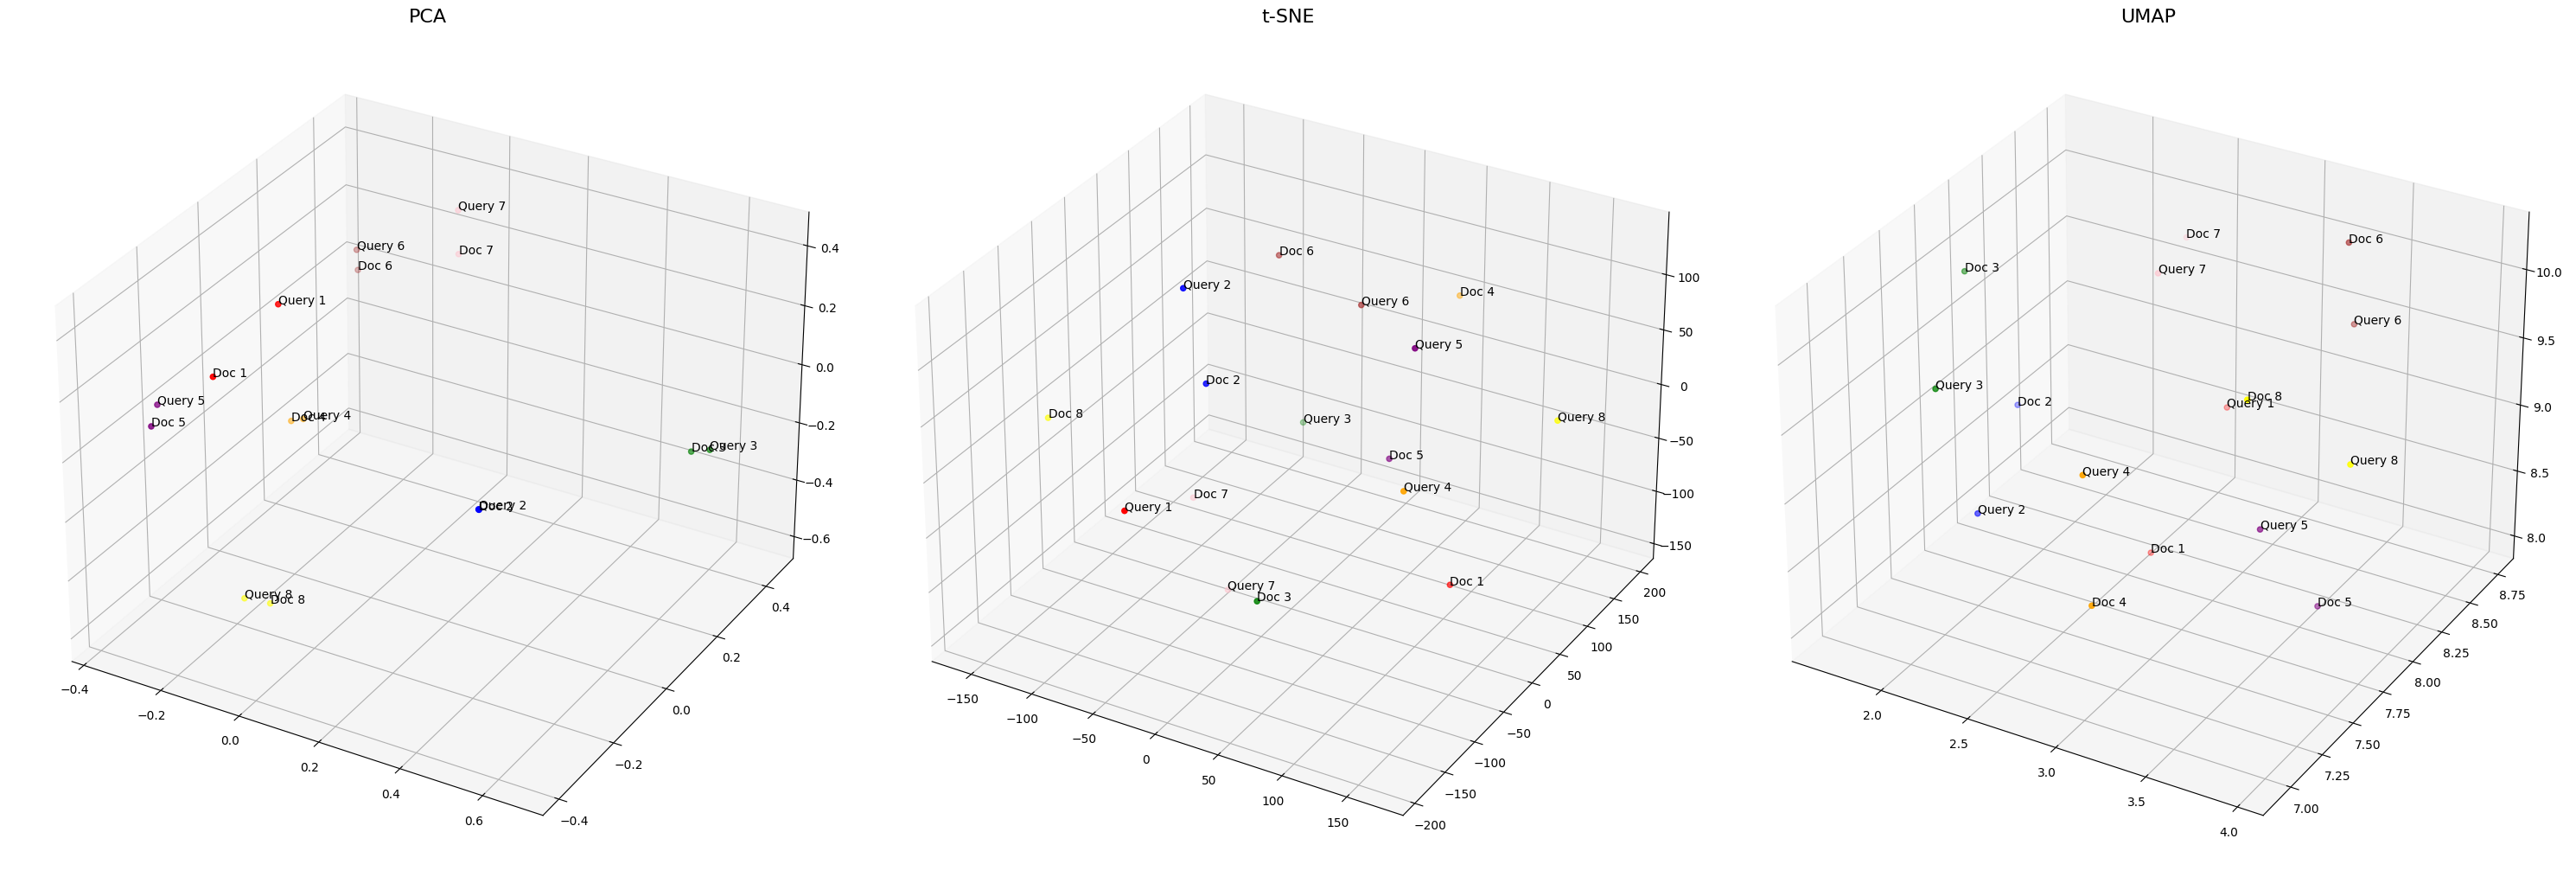

In [14]:
# Plotting the results
def plot_3d(data, labels, title, ax):
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'yellow', 'red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'yellow'])
    for i, label in enumerate(labels):
        ax.text(data[i, 0], data[i, 1], data[i, 2], label, fontsize=10)
    ax.set_title(title, fontsize=16)

fig = plt.figure(figsize=(30, 10))

ax1 = fig.add_subplot(131, projection='3d')
plot_3d(pca_result, labels, 'PCA', ax1)

ax2 = fig.add_subplot(132, projection='3d')
plot_3d(tsne_result, labels, 't-SNE', ax2)

ax3 = fig.add_subplot(133, projection='3d')
plot_3d(umap_result, labels, 'UMAP', ax3)

plt.tight_layout()
plt.show()

*   PCA Analysis

  Looking at the PCA plot, it does a decent job of capturing the big-picture structure of the data by focusing on the directions with the most variance. You can see that some points, like Query 8 and Doc 8, are fairly close to each other, suggesting they share some similarities. However, PCA doesn’t really capture the smaller, more nuanced relationships between the points. For example, Query 2 sits relatively isolated, and some clusters that you’d expect to see close together aren’t as distinct. This shows PCA’s limitations, especially when trying to represent more complex, non-linear relationships in the data. So while PCA is helpful for an overall view, it doesn’t fully bring out the finer connections between queries and documents.
*   t-SNE Analysis

  The t-SNE plot really gives a clearer view when it comes to showing clusters of similar points. Here, if you clearly see groups clustered together, it shows that they’re closely related. This is where t-SNE excels—it’s really good at capturing these local relationships and highlighting clusters of similar items. But there’s a trade-off: the overall structure feels a bit jumbled. For instance, Query 2 or 8 is placed pretty far from other clusters, which makes it hard to see how it fits into the bigger picture. This reflects t-SNE’s tendency to prioritize local details over global structure, making it great for spotting small groupings but less ideal for understanding the data as a whole.

*   UMAP Analysis

  UMAP presents a balanced layout in this plot. Both local and global relationships seem to be preserved well, with clusters forming for similar items like Query 7 and Doc 7, maintaining a logical spatial relationship. UMAP’s ability to handle both large and small distances effectively is apparent, with groups remaining close without unnecessary overlap. The parameters (n_neighbors=15 and min_dist=0.2) helped to create more distinct clusters that still relate to each other coherently, allowing UMAP to serve as a versatile visualization tool for this dataset.
